# Titanic: Machine Learning from Disaster

1、提出问题
2、数据准备：包，导入数据
3、理解数据：字段，关联性，记录异常值、缺失值情况
4、清洗数据：数据处理，重复项，缺失项
5、构建模型：模型比较，模型选择
6、模型预测：解决问题
7、总结

1、提出问题 Titanic: Machine Learning from Disaster

2、数据准备：包，导入数据

In [55]:
#2、数据准备：包，导入数据
#(1)导入相关包
import warnings#警告
warnings.filterwarnings('ignore')#忽略警告
import numpy as np#线性代数库
import pandas as pd#数据分析库
import seaborn as sns#可视化 (低级)
import matplotlib.pyplot as plt#可视化(高级)
#(2)设置可视化样式 
sns.set(style='white',context='notebook',palette='muted')
#(3)导入数据
train=pd.read_csv('E:\\Python\\Python项目\\Titanic\\train.csv')
test=pd.read_csv('E:/Python/Python项目/Titanic/test.csv')

In [56]:
#3、理解数据
#3.1查看数据情况
#(1)查看数据量及数据特征，分析特征意义：
print('实验数据大小:',train.shape)
print('预测数据大小:',test.shape)
#总体数据1309条，其中实验数据891条，预测数据418条，实验数据比预测数据多出一列：Survived
#(2)记录异常值，缺失值情况,方便进行数据预处理：
#将train、test数据合并查看数据情况
full=train.append(test,ignore_index=True)#ignore_index：默认值为False，如果为True则不使用index标签
full.describe()
#无明显异常值，数据都在合理范围内

实验数据大小: (891, 12)
预测数据大小: (418, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [57]:
full.info()#输出所有列的信息
#结果表明，Age/Fare/Cabin/Embarked四项有缺失值，其中cabin值缺失数量较多，近4分之3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


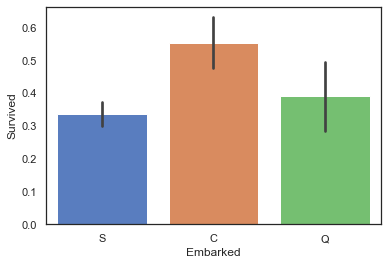

In [58]:
#3.2查看特征与标签间的关系(利用图表)
#3.2.1Embarked(登船地)与Survived（生存）之间的关系
sns.barplot(data=train,x='Embarked',y='Survived')

Embarked为"S"的乘客，其生存率为0.34
Embarked为"C"的乘客，其生存率为0.55
Embarked为"Q"的乘客，其生存率为0.39


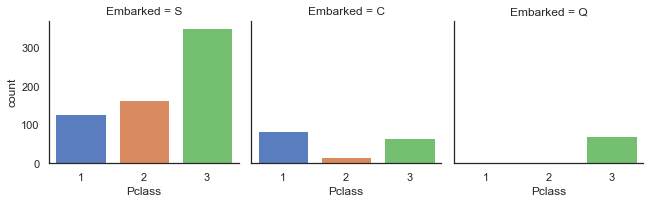

In [59]:
#计算不同Embarked（登船地）乘客的生存率
#将normalize设置为True时，通过将所有值除以值的总和来返回相对频率。value_counts代表频率统计。[1]表示存活。
print('Embarked为"S"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked为"C"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='C'].value_counts(normalize=True)[1])
print('Embarked为"Q"的乘客，其生存率为%.2f'%full['Survived'][full['Embarked']=='Q'].value_counts(normalize=True)[1])
#法国登船的乘客生存率最高，可能与其头等舱乘客比例最高有关。因此，查看不同登船地各舱位乘客数量情况。
sns.factorplot('Pclass',col='Embarked',data=train,size=3,kind='count')#col=列名
#法国登船的乘客，头等舱的比率更高。

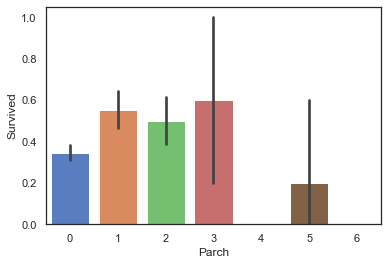

In [60]:
#3.2.2Parch(乘客同行的父母及子女数量)与Survived（生存）之间的关系
sns.barplot(data=train,x='Parch',y='Survived')
#当乘客同行的父母及子女数量为3（适中）时，生存率最高

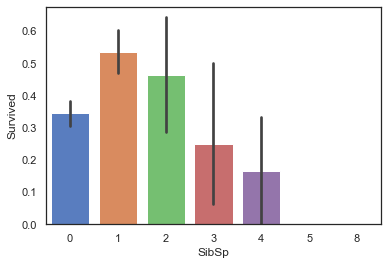

In [61]:
#3.2.3SibSp(乘客同行的同辈数量)与Survived（生存）之间的关系
sns.barplot(data=train,x='SibSp',y='Survived')
#当乘客同行的同辈数量为1时，生存率最高

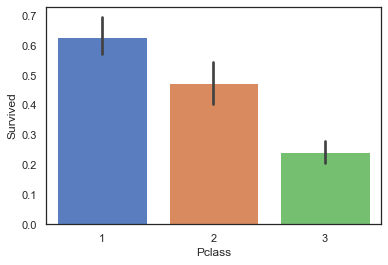

In [62]:
#3.2.4Pclass(乘客船舱等级)与Survived（生存）之间的关系
sns.barplot(data=train,x='Pclass',y='Survived')
#乘客船舱等级越高，生存率越高

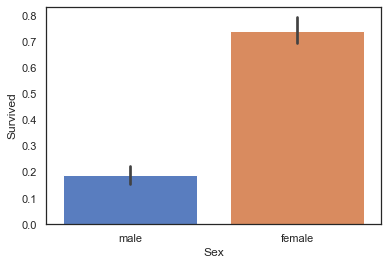

In [63]:
#3.2.5Sex(乘客船舱等级)与Survived（生存）之间的关系
sns.barplot(data=train,x='Sex',y='Survived')
#女性的生存率比男性更高


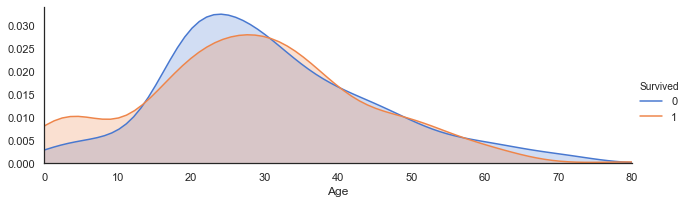

In [64]:
#3.2.6Age(乘客船舱等级)与Survived（生存）之间的关系
#创建坐标轴(aspect代表长宽乘积数)
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#选择作图类型(shade=ture表示曲线下的部分用其他颜色表示出来)
ageFacet.map(sns.kdeplot,'Age',shade=True)
#设置坐标轴范围及图例
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()
#年龄在0-10之间的生存率更高

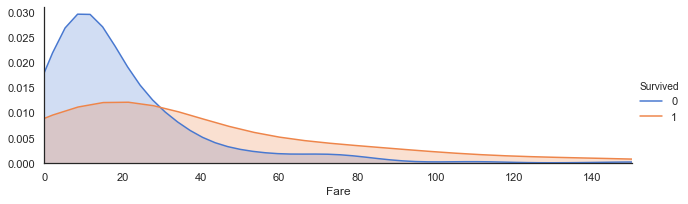

In [65]:
#3.2.7Fare(票价)与Survived（生存）之间的关系
#创建坐标轴(aspect代表长宽乘积数)
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

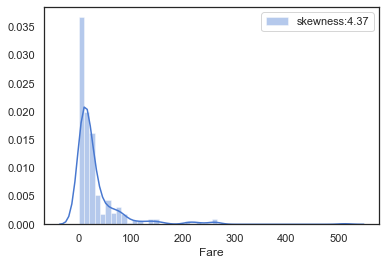

In [66]:
#查看票价的分布特征
farePlot=sns.distplot(full['Fare'][full['Fare'].notnull()],label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')
#fare的分布呈左偏的趋势，偏度高达4.37，说明偏离平均值较多，应对数据进行对数化处理，防止权重分布不均。



In [67]:
#放在第4节：full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)

#4、数据预处理
#数据清洗（缺失值及异常值的处理）
#特征工程（基于已发觉的特征，挖掘更多特征）
#同组识别（找出具有同组效应且违背规律的数据，对其进行修正）
#筛选子集（对数据降维，选择子集）

In [68]:
#4.1数据清洗
#Cabin/Embarked/Fare/Age四项存在缺失值，其中Age字段缺失较多，将在4.2特征工程中进行填充。
#4.1.1Cabin缺失值处理，利用U(unknown)填充
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()


0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [69]:
#4.1.2Embarked缺失值填充
#对Embarked缺失值进行处理，查看缺失值情况
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [70]:
full['Embarked'].value_counts()


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [71]:
#查看Embarked数据分布情况，可知在S港口登船的可能性最大，故以此填充缺失值。
full['Embarked']=full['Embarked'].fillna('S')

In [72]:
#4.1.3Fare缺失值填充
#查看Fare缺失值情况
full[full['Fare'].isnull()]
#该乘客登船港口为S，舱位3等，因此用S港口3等舱的平均票价来填充

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [73]:
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='C')&(full['Cabin']=='U')]['Fare'].mean())

In [74]:
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)

In [75]:
#4.2特征工程
#在理解原数据的特征基础上，特征工程对其进行整理，寻找新的特征来反映数据的更多信息。
#4.2.1Name中的title。不同title也会反映不同旅客的身份，把title提取出来，分析title与Survived之间的关系。
#（1）构造新title,[1]表示索引
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
#（2）查看title数据分布
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Dona              1
the Countess      1
Mme               1
Sir               1
Lady              1
Capt              1
Jonkheer          1
Don               1
Name: Title, dtype: int64

In [76]:
#（3）将title信息进行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

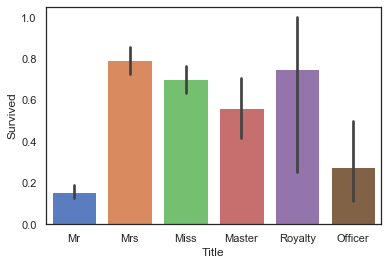

In [77]:
#（4）可视化分析title与survived之间的关系
sns.barplot(data=full,x='Title',y='Survived')
#title为Mr和Officer的生存率较低

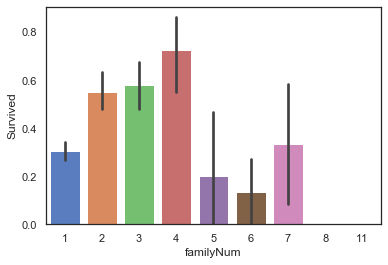

In [78]:
#4.2.2FamilyNum及FamilySize信息
#将Parch及SibSp字段整合得到一名乘客同行家庭人员的总人数FamilyNum的字段，再根据家庭人员具体人数的多少得到家庭规模FamilySize的字段。
#（1）FamilyNum
full['familyNum']=full['Parch']+full['SibSp']+1
#查看FamilyNum与Survived之间的关系
sns.barplot(data=full,x='familyNum',y='Survived')
#家庭成员在2-4人时，生存率最高

In [79]:
#（2）FamilySize，按照家庭人数的多少，将家庭规模分为“小，中，大”三类：
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

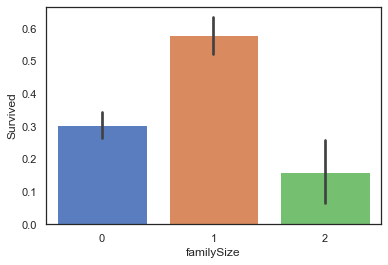

In [80]:
#(3)查看FamilySize和Survived之间的关系
sns.barplot(data=full,x='familySize',y='Survived')
#乘客规模适中时，生存率更高

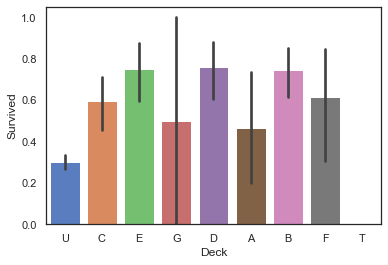

In [81]:
#4.2.3cabin客舱类信息-Deck
#Cabin字段的首字母代表客舱类型，能反映不同乘客的特点 ，可能与乘客生存率有关。
#截取Cabin字段首字母
full['Deck']=full['Cabin'].map(lambda x:x[0])
#查看Cabin和survived之间的关系
sns.barplot(data=full,x='Deck',y='Survived')
#当客舱等级为E/D/B时，生存率较高，为U/T时，生存率较低。

In [82]:
#4.2.4共票号乘客数量TickCot及TickGroup
#同一票号的乘客数量可能不同，可能也与生存率有关。
#(1)提取各票号的乘客数量
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head()

CA. 2343        11
CA 2144          8
1601             8
3101295          7
S.O.C. 14879     7
Name: Ticket, dtype: int64

In [83]:
#(2)将同票号乘客并入数据集中
full['TickCot']=full['Ticket'].map(TickCountDict)
full['TickCot'].head()

0    1
1    2
2    1
3    2
4    1
Name: TickCot, dtype: int64

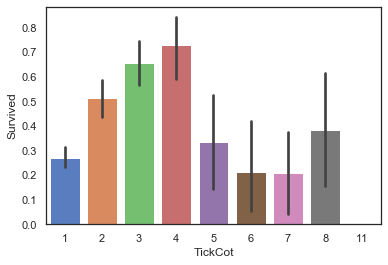

In [84]:
#(3)TickCot与survived之间的关系
sns.barplot(data=full,x='TickCot',y='Survived')
#相同票号乘客适中时，生存率较高。

In [85]:
#(4)按照TickCot，将TickGroup分为三类
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#得到各位乘客TickGroup的类别
full['TickGroup']=full['TickCot'].map(TickCountGroup)
full['TickGroup'].value_counts()


1    823
0    475
2     11
Name: TickGroup, dtype: int64

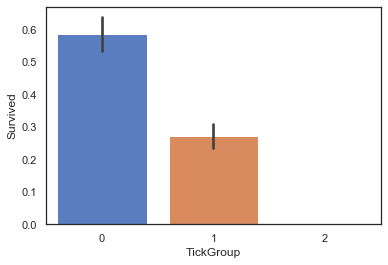

In [86]:
#查看TickGroup与Survived之间关系
sns.barplot(data=full,x='TickGroup',y='Survived')

In [87]:
#4.2.5Age缺失值填充-构建随机森林模型预测缺失的数据
#查看Age与Parch,Pclass,Sex,SibSp,familyNum、familySize、Deck、TickCot、TickGroup等变量相关系数的大小，筛选出相关性较高的变量构建预测模型。
#查看缺失值情况
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,U,Q,Mr,1,0,U,1,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,U,S,Mr,1,0,U,1,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,U,C,Mrs,1,0,U,1,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,U,C,Mr,1,0,U,1,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,U,Q,Miss,1,0,U,1,1


In [88]:
#(1)筛选数据
#筛选数据集
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
#查看变量间的相关性
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [89]:
#拼接数据
AgePre=pd.concat([AgePre,ParAge,PclAge,SibAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,22.0,0,3,1,2,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,38.0,0,1,1,2,2,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
3,35.0,0,1,1,2,2,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [90]:
#（2）拆分数据并建立模型（利用随机森林构建）
#拆分实验集和预测集
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnknown=AgePre[AgePre['Age'].isnull()]
#生成实验数据的特征和标签
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_Y=AgeKnown['Age']
#生成预测数据的特征
AgeUnknown_X=AgeUnknown.drop(['Age'],axis=1)

#利用随机森林构建模型
#random_state随机数种子，保证每次随机的结果都一样；n_estimators决策树的个数；n_jobsCPU核工作数量
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
#（3）利用模型进行预测，并填入原数据集中
#模型得分
rfr.score(AgeKnown_X,AgeKnown_Y)


0.5875161920737644

In [92]:
#预测年龄
AgeUnknown_Y=rfr.predict(AgeUnknown_X)
#填充预测数据
full.loc[full['Age'].isnull(),['Age']]=AgeUnknown_Y
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [93]:
#4.3同组识别
#虽然通过分析数据已有特征与标签的关系可以建立有效的模型，但是部分具有共同特征的用户可能与整体模型逻辑并不一致。如果能把具有同组效应的数据找到并进行修改，能够大大提高模型的准确率。
#在本项目中，我们主要探究具有相同姓氏的乘客是否具有同组效应。
#由于年龄和性别与生存率之间的关系最为紧密，因此，以这两个特征作为相同姓氏的乘客的分类标准。
#12岁以上的男性：找出男性中同姓氏获救的部分；
#女性以及年龄在12岁以下的儿童：找出女性及儿童中同姓氏遇难的部分



#(1)提取乘客的姓氏及相应的乘客数
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)


In [94]:
#将数据分为两组
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [95]:
#(2)男性同组效应分析
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()
#大多数同姓氏的男性存在‘同生共死’的特点，因此利用该同组效应，我们可以对生存率为1的姓氏里的男性数据进行修正，提升其预测为‘可以幸存’的概率。


0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [96]:
#获得生存率为1的姓氏
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [97]:
#(3)分析女性及儿童同组效应
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()
#大多数同姓氏的女性及儿童存在‘同生共死’的特点，因此利用该同组效应，我们可以对生存率为0的姓氏里的数据进行修正，提升其预测为‘未幸存’的概率。


1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [98]:
#获得生存率为0的姓氏
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [99]:
#(4)对数据集中这些姓氏的数据进行修正
#对数据集中的姓氏的男性数据进行修正：1、性别改为女2、年龄改为5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'

#对数据集中的姓氏的女性数据及儿童进行修正：1、性别改为男2、年龄改为60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

In [100]:
#4.4筛选子集
#在对数据进行处理的过程中，数据的维度更高了，为了剔除重复的且相关性较低的特征，需要对数据进行降维处理。
#(1)人工筛选
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#(2)查看各特征与标签的相关性
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059878
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

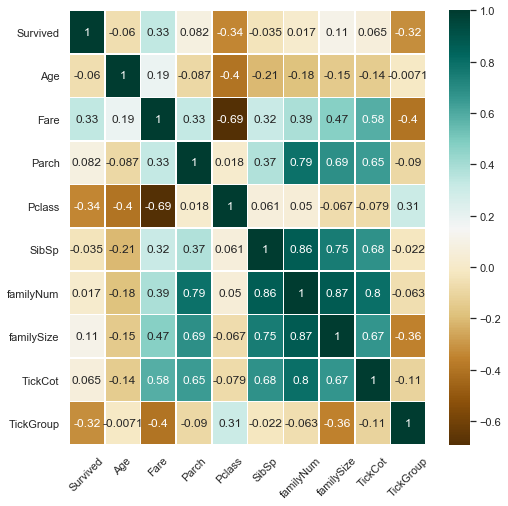

In [101]:
#(3)通过热力图，查看Survived与其他特征的相关性(cmap='BrBG'热力图颜色，annot=True在heatmap中每个方格写入数据
#linewidths=.5线宽;xticks设置标签位置；rotation旋转度）
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [102]:
#(4)先人工初步筛除与标签预测明显不相关或相关度很低的特征，再查看剩余特征与标签之间的相关性大小做进一步降维
fullSel=fullSel.drop(['familyNum','SibSp','Parch','TickCot'],axis=1)

In [103]:
#one-hot编码
fullSel=pd.get_dummies(fullSel)
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')

#拼接
fullSel=pd.concat([fullSel,familySizeDf,PclassDf,TickGroupDf],axis=1)

# 5、构建模型

In [104]:
# 本文先比较了SCV/Decision Tree/Gradient Boosting/Neural network/KNN/Logistic Regression等多种机器学习算法的结果，并对表现较好的Gradient Boosting及Logistic Regression做进一步的对比，最终选择Gradient Boosting对乘客生存率进行预测。

In [105]:
#5.1模型选择
#5.1.1建立模型
#主要考虑使用以下常用的机器学习算法进行比较：
#SCV;Decision Tree;Extra Trees;Gradient Boosting;Random Forest;KNN;Logistic Regression;Linear Discriminant Analysis
#(1)拆分实验数据和预测数据
experData=fullSel[fullSel['Survived'].notnull()]
perData=fullSel[fullSel['Survived'].isnull()]
#生成实验数据的特征和标签
experData_X=experData.drop('Survived',axis=1)
experData_Y=experData['Survived']
#生成预测数据的特征
perData_X=perData.drop('Survived',axis=1)

In [124]:
#(2)导入机器学习算法库
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.ensemble import VotingClassifier #模型组合


In [125]:
#(3)设置kfold,交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

In [126]:
#(4)汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())


In [127]:
#5.1.2比较各种算法结果，进一步选择模型
#不同机器学习交叉验证结果汇总(scoring='accuracy'得分具有准确性)
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_Y,scoring='accuracy',cv=kfold,n_jobs=-1))

In [128]:
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [129]:
#汇总数据
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla','GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})
cvResDf

,cv_mean,cv_std,algorithm
0,0.764419,0.050512,SVC
1,0.771111,0.051641,DecisionTreeCla
2,0.820449,0.048097,RandomForestCla
3,0.801361,0.040448,ExtraTreesCla
4,0.836180,0.040368,GradientBoostingCla
5,0.796904,0.037442,KNN
6,0.827191,0.031660,LR
7,0.823833,0.029460,LinearDiscrimiAna


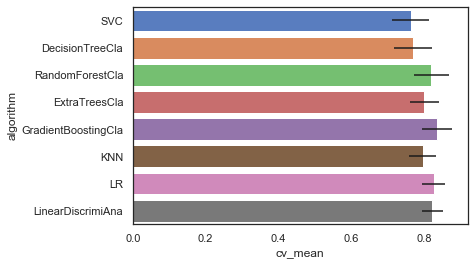

In [130]:
#可视化查看各算法的表现情况
sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

In [132]:
#5.2模型调参
#综合以上模型表现，考虑选择SVC、RandomForestCla、ExtraTreesCla、 GradientBoostingCla、LR应用到组合模型中去，接下来利用网格搜索对这五种模型进行调参，得到其最优参数：
#SVC模型
SVMC=SVC(probability=True)
svc_para_grid={'kernel':['rbf'],
              'gamma':[0.001,0.01,0.1,1],
              'C':[1,10,50,100,200,300,1000]}
modelgsSVMC=GridSearchCV(SVMC,param_grid=svc_para_grid,cv=kfold,
                        scoring='accuracy',n_jobs=-1,verbose=1)
modelgsSVMC.fit(experData_X,experData_Y)
SVMC_best=modelgsSVMC.best_estimator_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   45.4s finished


In [133]:
#RandomForestCla模型
RFC=RandomForestClassifier()
rf_param_grid={'max_depth':[None],
              'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}
modelgsRFC=GridSearchCV(RFC,param_grid=rf_param_grid,cv=kfold,
                       scoring='accuracy',n_jobs=-1,verbose=1)
modelgsRFC.fit(experData_X,experData_Y)
RFC_best=modelgsRFC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


In [134]:
#ExtraTreesCla模型
ExTC=ExtraTreesClassifier()
ExT_param_grid={'max_depth':[None],
              'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}
modelgsExTC=GridSearchCV(RFC,param_grid=ExT_param_grid,cv=kfold,
                       scoring='accuracy',n_jobs=-1,verbose=1)
modelgsExTC.fit(experData_X,experData_Y)
ExTC_best=modelgsExTC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


In [135]:
#GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsGBC.fit(experData_X,experData_Y)
GBC_best=modelgsGBC.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   48.5s finished


In [136]:
#Logistic Regression模型
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_Y)
LR_best=modelgsLR.best_estimator_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


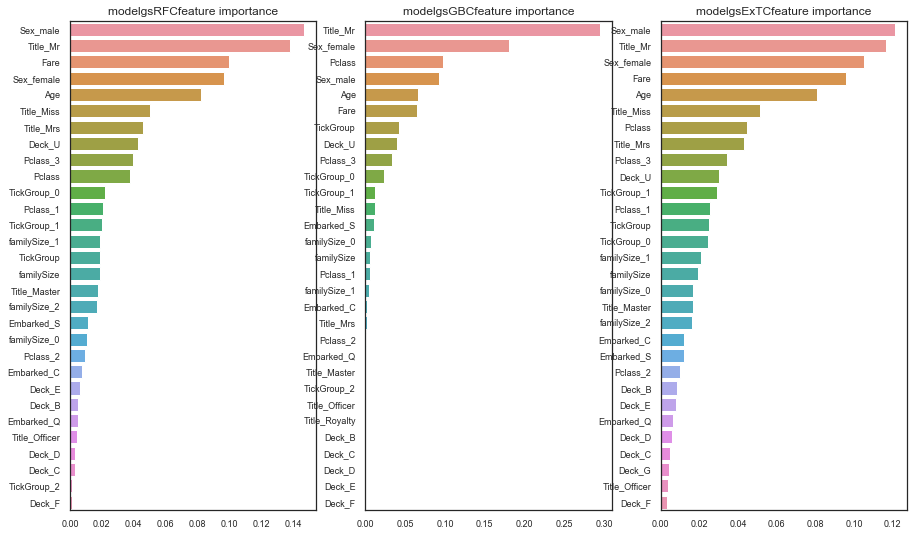

In [137]:
#5.3查看不同模型使用特征值权重
#绘制一行三列的子图
nrows,ncols=1,3
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,9),
                     squeeze=False)

#循环的列表
names_classifiers=[('modelgsRFC',RFC_best),('modelgsGBC',GBC_best),
                   ('modelgsExTC',ExTC_best)]
n_classifier=0
for row in range(nrows):
    for col in range(ncols):
        name=names_classifiers[n_classifier][0]
        classifier=names_classifiers[n_classifier][1]
        #先根据classifier.feature_importances_的值进行降序排序，并取钱30
        indices=np.argsort(classifier.feature_importances_)[::-1][:30]
        #绘制柱状物，y轴对应特征列的名称，x轴对应特征列所占重要程度比例
        g=sns.barplot(y=experData_X.columns[indices][:30],
                      x=classifier.feature_importances_[indices][:30],
                      orient='h',ax=axes[row][col])
        g.tick_params(labelsize=9)
        g.set_title(name+'feature importance')
        n_classifier+=1

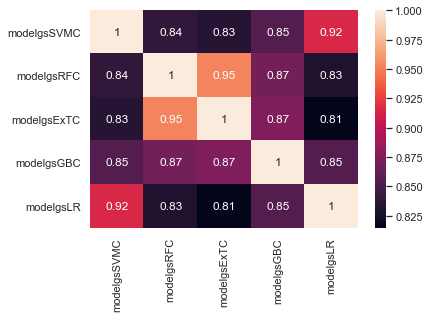

In [138]:
#5.4组合模型
#组合模型前，我们先查看各个模型在取最优参数时的表现是否相似
test_modelgsSVMC=pd.Series(modelgsSVMC.predict(perData_X),name='modelgsSVMC')
test_modelgsRFC=pd.Series(modelgsRFC.predict(perData_X),name='modelgsRFC')
test_modelgsExTC=pd.Series(modelgsExTC.predict(perData_X),name='modelgsExTC')
test_modelgsGBC=pd.Series(modelgsGBC.predict(perData_X),name='modelgsGBC')
test_modelgsLR=pd.Series(modelgsLR.predict(perData_X),name='modelgsLR')
#将结果合并
ensemble_results=pd.concat([test_modelgsSVMC,test_modelgsRFC,test_modelgsExTC,
                           test_modelgsGBC,test_modelgsLR],axis=1)
#通过热力图查看不同模型结果相关性
sns.heatmap(ensemble_results.corr(),annot=True)

In [139]:
#组合模型
modelVoting=VotingClassifier(estimators=[('SVMC_best',SVMC_best),('RFC_best',RFC_best),
                                         ('ExTC_best',ExTC_best),('GBC_best',GBC_best),('LR_best',LR_best)],
                            voting='soft',n_jobs=-1,weights=[1 , 1 , 1, 1, 1])
modelVoting.fit(experData_X,experData_Y)
modelVoting=VotingClassifier(estimators=[('SVMC_best',SVMC_best),('RFC_best',RFC_best),
                                         ('ExTC_best',ExTC_best),('GBC_best',GBC_best),('LR_best',LR_best)],
                            voting='soft',n_jobs=-1,weights=[1 , 1 , 1, 1, 1])
modelVoting.fit(experData_X,experData_Y)

VotingClassifier(estimators=[('SVMC_best',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.01, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('RFC_best',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     crite...
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         w

In [140]:
#5.5查看模型得分
#experData_X,experData_Y.score()
print('模型精度为%0.3f'%cross_val_score(modelVoting,experData_X,experData_Y,
                scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1).mean())
print('模型AUC为%0.3f'%cross_val_score(modelVoting,experData_X,experData_Y,
                scoring='roc_auc',cv=kfold,n_jobs=-1,verbose=1).mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


模型精度为0.844
模型AUC为0.882


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


# 6.模型预测

In [141]:
#modelVoting
VotingpreData_y=modelVoting.predict(perData_X)
VotingpreData_y=VotingpreData_y.astype(int)
#导出预测结果
VotingpreResultDf=pd.DataFrame()
VotingpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
VotingpreResultDf['Survived']=VotingpreData_y
VotingpreResultDf
#将预测结果导出为csv文件
VotingpreResultDf.to_csv('E:/Python/Python项目/Titanic/TitanicVoting.csv',index=False)